<h1>D207 - Exploratory Data Analysis</h1>
<h2>By: Jacob Colp</h2>

<h3>A1.</h3>

What recorded variables are related to hospital readmission in a statistically significant (p$\leq$0.05) way?

<h3>A2.</h3>

Within the provided data dictionary - it is very clearly defined that medical readmission are a costly occurrence for hospitals on multiple fronts. Hospitals can be find and want to ensure that patients avoid unneeded stress caused by potential re-admittance. A business unit could benefit from being able to identify key populations at risk for readmission. Recognizing the risk factors that most often lead to an example of readmission can better inform preventative care and key vulnerabilities within patients.

<h3>A3.</h3>

Outside of our unique keys - really any of our variables could be evaluated for this question. It could be dangerous to assume that certain variables are not. That said - in looking ahead, I am going to utilize a chi-squared test of independence to measure our research question. So, we are going to be limited to categorical variables. Also - I want to keep in mind that our expected values need to be above 5, so we need to have variables with limited categories. Here's a list of good candidates:
<li>State
<li>Area
<li>Children
<li>Marital
<li>Gender
<li>ReAdmis
<li>Soft_drink
<li>Initial_admin
<li>HighBlood
<li>Stroke
<li>Complication_risk
<li>Overweight
<li>Arthritis
<li>Diabetes
<li>Hyperlipidemia
<li>BackPain
<li>Anxiety
<li>Allergic_rhinitis
<li>Reflux_esophagitis
<li>Asthma
<li>Services
<li>Timely_Admission
<li>Timely_Treatment
<li>Timely_Visits
<li>Reliability
<li>Options
<li>Hours_of_treatment
<li>Courteous_Staff
<li>Evidence_of_active_listening



In [46]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_theme(style='whitegrid')

In [47]:
med_df = pd.read_csv('medical_clean.csv')

med_df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,50159.323900,38.751099,-91.243080,9965.253800,2.097200,53.511700,40490.495160,17.964262,5.012200,...,5312.172769,12934.528587,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,2886.89568,27469.588208,5.403085,15.205998,14824.758614,2.163659,20.638538,28521.153293,2.017231,1.045734,...,2180.393838,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,1.00000,610.000000,17.967190,-174.209700,0.000000,0.000000,18.000000,154.080000,9.806483,1.000000,...,1938.312067,3125.703000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,27592.000000,35.255120,-97.352982,694.750000,0.000000,36.000000,19598.775000,16.626439,4.000000,...,3179.374015,7986.487755,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33768.420000,17.951122,5.000000,...,5213.952000,11573.977735,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,7500.25000,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54296.402500,19.347963,6.000000,...,7459.699750,15626.490000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.100000,26.394449,9.000000,...,9180.728000,30566.070000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [48]:
med_df.rename({'Item1':'Survey_Timely_Admission', 'Item2':'Survey_Timely_Treatment', 'Item3':'Survey_Timely_Visits', 'Item4':'Survey_Reliability', 'Item5':'Survey_Options', 'Item6':'Survey_Hours_of_Treatment','Item7':'Survey_Courteous_Staff', 'Item8':'Survey_Evidence_of_Active_Listening'},axis=1, inplace=True)

In [49]:
med_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   CaseOrder                            10000 non-null  int64  
 1   Customer_id                          10000 non-null  object 
 2   Interaction                          10000 non-null  object 
 3   UID                                  10000 non-null  object 
 4   City                                 10000 non-null  object 
 5   State                                10000 non-null  object 
 6   County                               10000 non-null  object 
 7   Zip                                  10000 non-null  int64  
 8   Lat                                  10000 non-null  float64
 9   Lng                                  10000 non-null  float64
 10  Population                           10000 non-null  int64  
 11  Area                         

In [50]:
for x in med_df:
    print(med_df[x].value_counts())

1        1
6671     1
6664     1
6665     1
6666     1
        ..
3334     1
3335     1
3336     1
3337     1
10000    1
Name: CaseOrder, Length: 10000, dtype: int64
C412403    1
D294364    1
B203210    1
C20177     1
K216020    1
          ..
J694995    1
N704840    1
A197688    1
H115454    1
I569847    1
Name: Customer_id, Length: 10000, dtype: int64
8cd49b13-f45a-4b47-a2bd-173ffa932c2f    1
dc1799a6-61d1-44a3-9b94-b89584baddfc    1
dc6bab10-659b-4c78-ba87-87ffa3def32f    1
1cb70cc8-47b7-4192-8bed-faad0f27ab3b    1
06d0da86-5600-472d-a35d-7632775b5cd7    1
                                       ..
2d5c049d-0431-443f-a9d7-46f875998599    1
4ccc7838-5c2c-4a3c-9e3b-2a646cec157e    1
4767cd0e-626d-4c5a-834e-a948aba315c2    1
8b1e1ea3-e596-4a97-b2cb-7f9926e9fbee    1
bc482c02-f8c9-4423-99de-3db5e62a18d5    1
Name: Interaction, Length: 10000, dtype: int64
3a83ddb66e2ae73798bdf1d705dc0932    1
5d85418e862aab28ed18975446153694    1
28970195a839f74e572d2f43bd7fcb71    1
24665d1c5070b579d0c19

In [51]:
#This is just me replacing Yes and No with binary values and converting Complication_risk to a numeric ordinal sequence

med_df.Complication_risk.replace({'High':3,'Medium':2,'Low':1}, inplace=True)

for x in med_df:
    if med_df[x].dtype == 'object':
        med_df[x].replace({'Yes':1,'No':0}, inplace=True)
    else:
        continue

<h3>B1.</h3>

I have chosen the chi-square test of independence. Below is the code to perform this test over all of our categorical variables. The null hypothesis will be: There is no statistically significant (p$\leq$0.05) relationship between X categorical variable and ReAdmission. Our Alternative Hypothesis will be: There IS a statistically significant (p$\leq$0.05) relationship between X categorical variable and ReAdmission. I am going to run this test on all the variables listed above - so X can be substituted with the variable we have iterrated to at that moment. A great sample of this test in python can be found here: https://www.kaggle.com/hamelg/python-for-data-25-chi-squared-tests#Python-for-Data-25:-Chi-Squared-Tests. I have taken inspiration from this and built on top of it.

In [52]:
#This gives us the crosstab that we need to do our Chi^2 test for independence. This is an example as I am going to run through all variables to perform Chi^2

over_v_readmis = pd.crosstab(med_df.ReAdmis,med_df.Overweight)

over_v_readmis

Overweight,0,1
ReAdmis,,
0,1821,4510
1,1085,2584


In [53]:
#choosing to set my alpha at 0.05

relevant_columns = ['State','Area','Marital','Gender','Soft_drink',
                   'Initial_admin','HighBlood','Stroke','Complication_risk','Overweight','Arthritis','Diabetes','Hyperlipidemia','BackPain','Anxiety','Allergic_rhinitis',
                   'Reflux_esophagitis','Asthma','Services','Survey_Timely_Admission','Survey_Timely_Treatment','Survey_Timely_Visits','Survey_Reliability','Survey_Options',
                   'Survey_Hours_of_Treatment','Survey_Courteous_Staff','Survey_Evidence_of_Active_Listening']

p_values_dictionary = {}

for x in relevant_columns:
    crosstab_x_read = pd.crosstab(med_df.ReAdmis,med_df[x])

    chi2, p, dof, expected = scipy.stats.chi2_contingency(crosstab_x_read)

    p_values_dictionary[x]=p

    print(f"""
    column compared = {x}
    CHI^2 = {chi2}
    p = {p}
    dof = {dof}
    ev = {expected}
    """)

print(p_values_dictionary)




    column compared = State
    CHI^2 = 46.75789223185776
    p = 0.6427198533588114
    dof = 51
    ev = [[ 44.317  122.8214 120.289   68.3748 348.205  113.3249  50.648    8.2303
   10.7627 192.4624 156.3757  21.5254 174.7356  69.0079 279.8302 123.4545
  139.282  132.951  109.5263  94.3319  82.9361  77.2382 172.8363 169.0377
  207.6568  84.8354  70.9072 160.8074  68.3748 117.1235  50.0149 111.4256
   69.641   32.2881 325.4134 242.4773 131.0517  77.2382 346.3057  27.2233
    8.8634  81.0368  77.8713 122.8214 350.1043  45.5832 181.6997  37.986
  120.9221 135.4834 131.0517  32.2881]
 [ 25.683   71.1786  69.711   39.6252 201.795   65.6751  29.352    4.7697
    6.2373 111.5376  90.6243  12.4746 101.2644  39.9921 162.1698  71.5455
   80.718   77.049   63.4737  54.6681  48.0639  44.7618 100.1637  97.9623
  120.3432  49.1646  41.0928  93.1926  39.6252  67.8765  28.9851  64.5744
   40.359   18.7119 188.5866 140.5227  75.9483  44.7618 200.6943  15.7767
    5.1366  46.9632  45.1287  71.1786 20

<h3>B2 and B3.</h3>

B2. You can find the output of all of our tests above.

B3. I chose to use a chi-square of independence test. For our business case - I believe that finding a strong a relationship between a variable and our ReAdmissions holds immense values. I believe that if we can find a strong level of dependence within categorical variables - we will better be able to identify our most at risk populations. For example - we could identify someone as overweight - recognize that is related to readmission and take preventive steps in treatment prior to discharge. Additionally - much of our collected information that could intelligently be linked to readmission is in the form of categorical variables. So, performing a test that helps us to measure the relationship between categorical variables fits the format of our provided data best.


<h3>C1.</h3>

Univariate statistics utilized for the below distributions.

<AxesSubplot:xlabel='TotalCharge'>

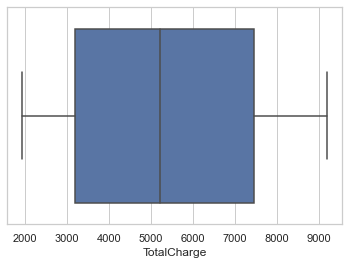

In [54]:
sns.boxplot(x=med_df.TotalCharge)

<AxesSubplot:xlabel='Initial_days'>

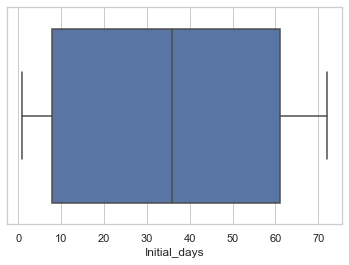

In [55]:
sns.boxplot(x=med_df.Initial_days)

<AxesSubplot:xlabel='Complication_risk', ylabel='count'>

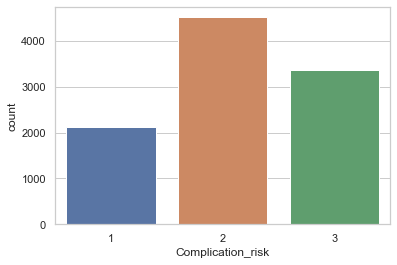

In [56]:
sns.countplot(x=med_df.Complication_risk)

<AxesSubplot:xlabel='Survey_Timely_Treatment', ylabel='count'>

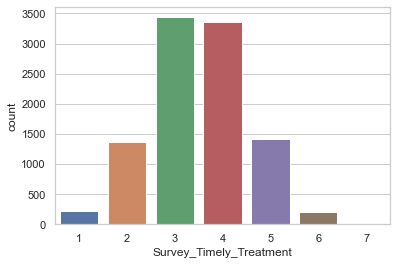

In [57]:
sns.countplot(x=med_df.Survey_Timely_Treatment)

<h3>D1.</h3>

Bivariate statistics utilized for the below distributions.

In [58]:
bivariate_cols = med_df[['Survey_Timely_Treatment','Complication_risk', 'Initial_days', 'TotalCharge']]

bivariate_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survey_Timely_Treatment  10000 non-null  int64  
 1   Complication_risk        10000 non-null  int64  
 2   Initial_days             10000 non-null  float64
 3   TotalCharge              10000 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 312.6 KB


<AxesSubplot:>

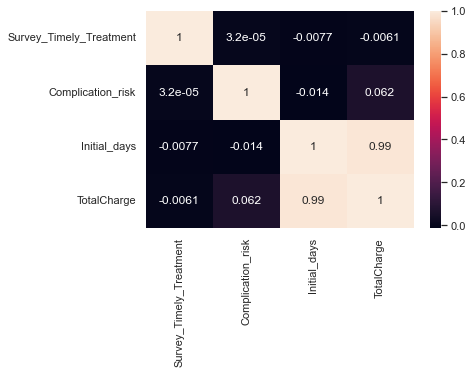

In [59]:
sns.heatmap(bivariate_cols.corr(), annot=True)

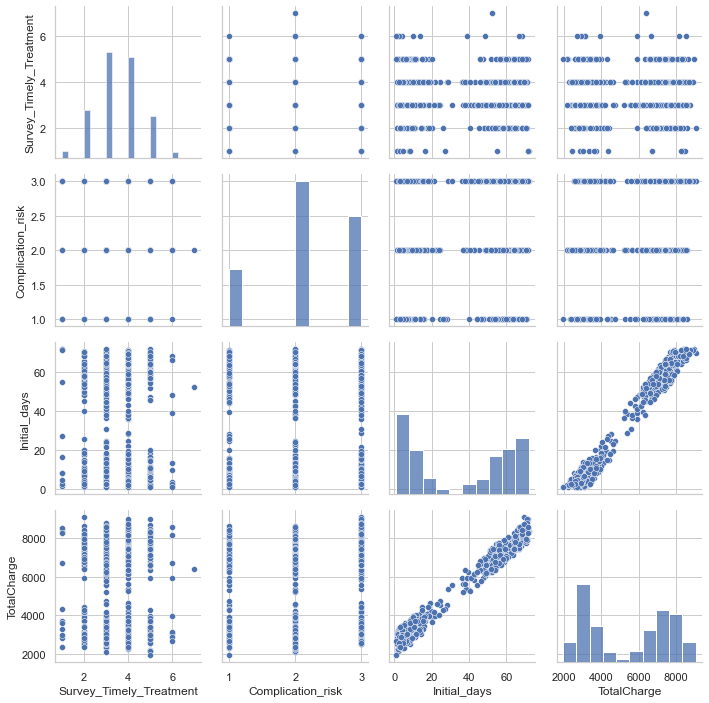

In [60]:
#https://seaborn.pydata.org/tutorial/axis_grids.html

g = sns.PairGrid(bivariate_cols.sample(500))
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

<h3>E1.</h3>

From our hypothesis testing - we can see that there is only one variable with a low enough p-value for us to reject our null hypothesis on. That variable would be Services. In simplest terms - the observed relationship between Services and ReAdmissions would only happen by chance, less than 5% of the time. However, we will fail to reject the null hypothesis in the remaining variables. Overall, I believe that this test provides the greatest benefit in the type of data we have been provided with. I believe this answers relevant business questions and gives us actionable insight moving forward.

<h3>E2.</h3>

To refer back to D206 and bring into context the fact that this data was cleaned and certain values were imputed - I would say that a decent case could be made to reassess the way that this data was collected. Since we were unable to find meaningful relationship in most of our data - and some of the relationship we see is nonsensical (i.e. survey questions based around perception holding most of the correlation), I believe it would be fair to reevaluate methodology on that front.

In terms of more specific limitations - I know that the Chi-Squared test is not the only test that could be run on some of these variables. For example - Chi-Square test of independence does not account for ordinal values. Some of our variables are ordinal and so may benefit from a different type of statistical test being utilized on them. A somewhat blanket assumption was made about the nature of our categorical variables and a single statistical test was applied do them. None of our assumptions were violated (McHugh, 2013), but that does not make the test ideal in comparison to all others. Given more time, more context, and more control - there are potentially more effective methods to be utilized here.

<h3>E3.</h3>

Based upon my analysis here - I believe that the best course of action would be to reevaluate the data collection process and perhaps expand our areas of research. With the information we have found here - we have failed to make any truly meaningful insight at this juncture. Outside of services, the only significant relationship is seen in our bivariate analysis between initial_days and totalcharge. And that makes a lot of sense since the more time you spend in the hospital - the more it costs. If we want to dig deeper on our analysis - it may be worthwhile to split our sample into different groups based upon their length of stay. Perhaps there is more insight to be found in the relationship of unique variables to those different sections of the, seemingly, bimodal distribution. With that - maybe we see that people with shorter stays (perhaps after a minor surgery) are more at risk for readmission if they have a history of arthritis. But, maybe in the longer stay group - we see a relationship between high blood pressure and readmission. Of course, these are novel examples, but do illustrate a possible expansion that could be made. Were we to look at services - I believe we could then continue to expand our analysis and see what services are placing patients at a higher risk of readmission. Ultimately - I believe that there are underlying issues in this study that need to be addressed before meaningful outcomes can be found. At the very least - I believe we should expand our variable selection and see if relationships can be derived from an expanded feature set.

<h2>Sources</h2>

CHI-square test of independence. (n.d.). JPM. https://www.jmp.com/en_us/statistics-knowledge-portal/chi-square-test/chi-square-test-of-independence.html

Hamel, G. (2019, April 29). Python for data 25: CHI-squared tests. Kaggle: Your Machine Learning and Data Science Community. https://www.kaggle.com/hamelg/python-for-data-25-chi-squared-tests

Lowry, R. (n.d.). Inferential statistics. VassarStats: Statistical Computation Web Site. https://vassarstats.net/textbook/index.html

McHugh, M. (2013, June 15). The CHI-square test of independence. PubMed Central (PMC). https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3900058/#:~:text=The%20assumptions%20of%20the%20Chi,the%20variables%20are%20mutually%20exclusive

Scipy.stats.chi2_contingency — SciPy v1.8.0.dev0+2060.9484b9d manual. (n.d.). https://scipy.github.io/devdocs/reference/generated/scipy.stats.chi2_contingency.html?highlight=chi2_cont#scipy.stats.chi2_contingency